In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from wordcloud import WordCloud

In [27]:
df = pd.read_csv('../data/fns_dataset.csv') 

In [28]:
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Unnamed: 0  1407328 non-null  int64 
 1   headline    1407328 non-null  object
 2   url         1407328 non-null  object
 3   publisher   1407328 non-null  object
 4   date        1407328 non-null  object
 5   stock       1407328 non-null  object
dtypes: int64(1), object(5)
memory usage: 64.4+ MB
None
   Unnamed: 0                                           headline  \
0           0            Stocks That Hit 52-Week Highs On Friday   
1           1         Stocks That Hit 52-Week Highs On Wednesday   
2           2                      71 Biggest Movers From Friday   
3           3       46 Stocks Moving In Friday's Mid-Day Session   
4           4  B of A Securities Maintains Neutral on Agilent...   

                                                 url          publisher  \
0  https://w

In [29]:
df['headline_length'] = df['headline'].apply(len)
print(df['headline_length'].describe())

count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64


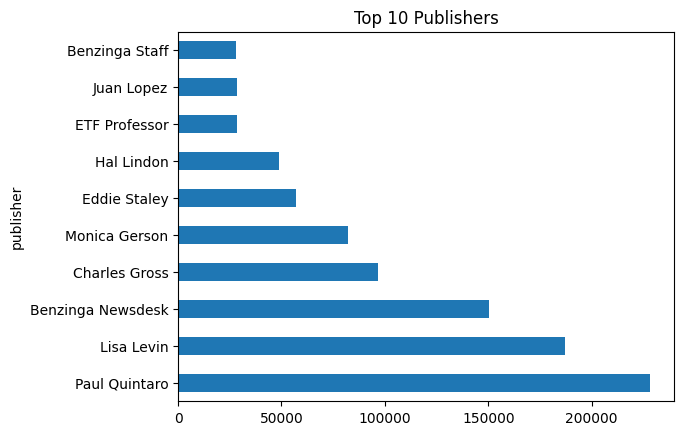

In [30]:
publisher_counts = df['publisher'].value_counts()
publisher_counts.head(10).plot(kind='barh')
plt.title('Top 10 Publishers')
plt.show()

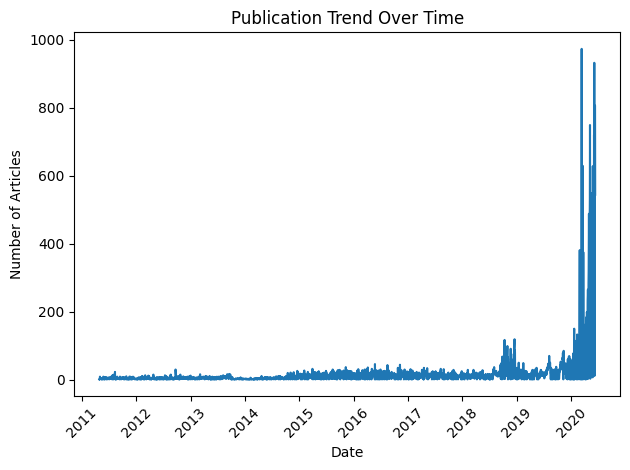

In [31]:

df['date'] = pd.to_datetime(df['date'], errors='coerce')  
df = df.dropna(subset=['date'])  
df['date'] = df['date'].dt.date 
df['date'].value_counts().sort_index().plot()
plt.title("Publication Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Articles")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

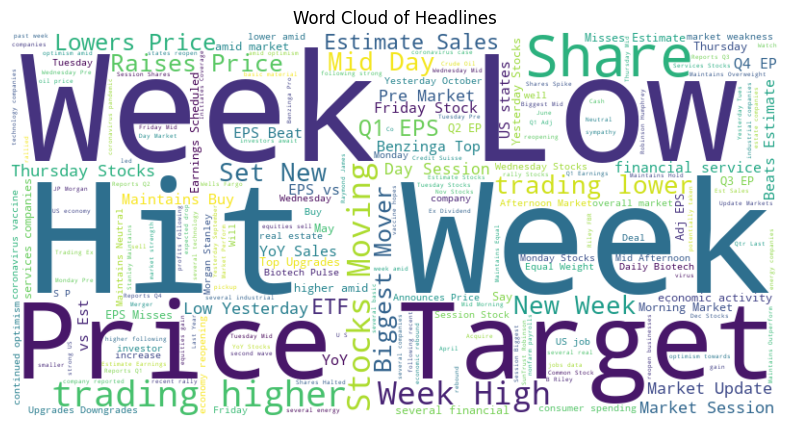

In [32]:
all_headlines = ' '.join(df['headline'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_headlines)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Headlines")
plt.show()